# Evaluation of Regression Model

In [1]:
# Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Settings
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Task: 
Employees' years of experience and salary information are given. 
- years_of_experience_x = [5, 7, 3, 3, 2, 7, 3, 10, 6, 4, 8, 1, 1, 9, 1]
- salary_y = [600, 900, 550, 500, 400, 950, 540, 1200, 900, 550, 1100, 460, 400, 1000, 380]

In [2]:
df = {'years_of_experience_x': [5, 7, 3, 3, 2, 7, 3, 10, 6, 4, 8, 1, 1, 9, 1],
      'salary_y': [600, 900, 550, 500, 400, 950, 540, 1200, 900, 550, 1100, 460, 400, 1000, 380]}
df = pd.DataFrame(df)
df

,years_of_experience_x,salary_y
0,5,600
1,7,900
2,3,550
3,3,500
4,2,400
5,7,950
6,3,540
7,10,1200
8,6,900
9,4,550


Step 1: Create the linear regression model equation according to the given bias and weight.
Bias = 275, Weight= 90 (y' = b+wx)

In [3]:
# Salary = 275 + (90 * Years of Experience)

Step 2: Estimate the salary for all years of experience in the table according to the model equation you have created.

In [4]:
X = df[['years_of_experience_x']]
y = df[['salary_y']]

# Model
reg_model = LinearRegression().fit(X, y)

# Salary Prediction
df['salary_pred'] = reg_model.predict(X)
df.head()

,years_of_experience_x,salary_y,salary_pred
0,5,600,725.403
1,7,900,905.822
2,3,550,544.984
3,3,500,544.984
4,2,400,454.775


In [5]:
print(f'Score: {reg_model.score(X, y)}')
print(f'Coefficient (weight): {reg_model.coef_[0][0]}')
print(f'Intercept (bias): {reg_model.intercept_[0]}')

Score: 0.9396360551357491
Coefficient (weight): 90.20942408376962
Intercept (bias): 274.35602094240846


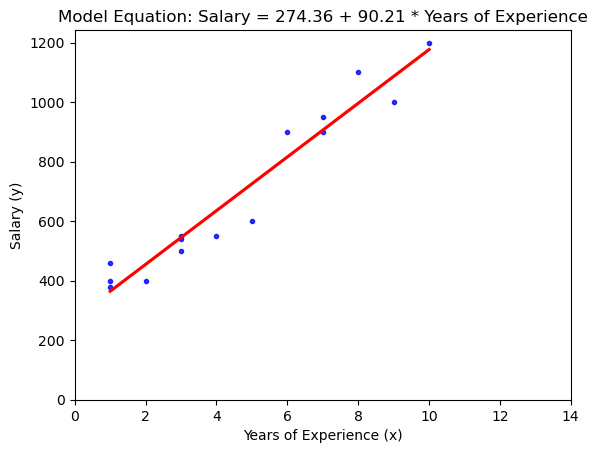

In [6]:
# Bias = 275, Weight= 90
g = sns.regplot(x=X, 
                y=y, 
                scatter_kws={'color': 'b', 's': 9},
                ci=False, 
                color='r')

g.set_title(f'Model Equation: Salary = {round(reg_model.intercept_[0], 2)} + {round(reg_model.coef_[0][0], 2)} * Years of Experience')
g.set_ylabel('Salary (y)')
g.set_xlabel('Years of Experience (x)')
plt.xlim(0, 14)
plt.ylim(bottom=0)
plt.show()

Step 3: Calculate MSE, RMSE, MAE scores to measure the success of the model.

In [7]:
y_pred = df[['salary_pred']]
y_pred

,salary_pred
0,725.403
1,905.822
2,544.984
3,544.984
4,454.775
5,905.822
6,544.984
7,1176.450
8,815.613
9,635.194


In [8]:
# MSE
mean_squared_error(y, y_pred)

4437.849912739964

In [9]:
# RMSE
np.sqrt(mean_squared_error(y, y_pred))

66.61718931882343

In [10]:
# MAE
mean_absolute_error(y, y_pred)

54.32041884816754